In [116]:
import numpy as np
import matplotlib.pyplot as plt
import math
import importlib

import hwutils as util

%matplotlib inline

In [95]:
importlib.reload(util)

<module 'hwutils' from '/home/bogdan/Documents/cs1156x/hwutils.py'>

### Hoeffding Inequality

In [105]:
N_FLIPS = 10
P_HEADS = 0.5
N_COINS = 1000
N_RUNS = int(1e5)

In [106]:
def run_experiment(n_flips, p_heads, n_coins):
    nu = np.random.binomial(n_flips, p_heads, size=n_coins) / n_flips
    nu_1st = nu[0]
    nu_rand = nu[np.random.choice(n_coins)]
    nu_min = np.min(nu)
    
    return nu_1st, nu_rand, nu_min

def get_nus(n_runs):
    nu_1st, nu_rand, nu_min = [np.empty(n_runs, dtype=np.float) for _ in range(3)]
    for i in range(n_runs):
        nu_1st[i], nu_rand[i], nu_min[i] = run_experiment(N_FLIPS, P_HEADS, N_COINS)
    
    return nu_1st, nu_rand, nu_min

In [107]:
# Problem 1
nu_1st, nu_rand, nu_min = get_nus(N_RUNS)
nu_1st.mean(), nu_rand.mean(), nu_min.mean()

(0.50151099999999993, 0.50022199999999994, 0.037762999999999998)

In [113]:
# Problem 2
hoeffding_rhs = {eps: 2 * math.exp(-2 * eps**2 * N_FLIPS) for eps in [.1, .2, .3, .4]}

for name, nu in (('nu_1st', nu_1st), ('nu_rand', nu_rand), ('nu_min', nu_min)):
    for eps, rhs in hoeffding_rhs.items():
        print("{0}: eps={1} => {2}".format(name,
                                           eps,
                                           (np.sum(np.abs(nu - P_HEADS) > eps) / N_RUNS) <= rhs))

nu_1st: eps=0.1 => True
nu_1st: eps=0.2 => True
nu_1st: eps=0.3 => True
nu_1st: eps=0.4 => True
nu_rand: eps=0.1 => True
nu_rand: eps=0.2 => True
nu_rand: eps=0.3 => True
nu_rand: eps=0.4 => True
nu_min: eps=0.1 => True
nu_min: eps=0.2 => False
nu_min: eps=0.3 => False
nu_min: eps=0.4 => False


### Linear Regression

In [24]:
INTERVAL = np.array([-1., 1.])

In [45]:
w_true = util.get_2D_line(*np.random.uniform(*INTERVAL, 4))
X = util.get_2D_points(100, INTERVAL)
y = util.label_points(X, w_true)
w_hat = fit_linear_regression(X, y)

linf_true, linf_hat = [util.get_2D_line_function(w) for w in (w_true, w_hat)]

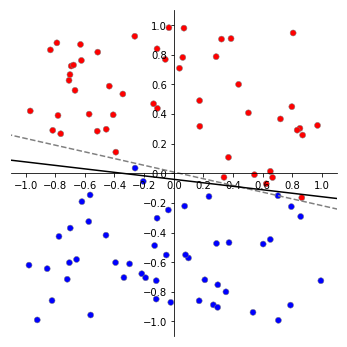

In [46]:
plt.figure(figsize=(8,6))
ax = plt.gca()

plt.xlim(*INTERVAL*1.1)
plt.ylim(*INTERVAL*1.1)
ticks = np.linspace(*INTERVAL, 11)
plt.xticks(ticks)
plt.yticks(ticks)
for pos in ['right', 'top']:   ax.spines[pos].set_color('none')
for pos in ['left', 'bottom']: ax.spines[pos].set_position('zero')
ax.set_aspect('equal')

plt.plot(INTERVAL*2, linf_true(INTERVAL*2), linestyle='--', color='gray')
plt.plot(INTERVAL*2, linf_hat(INTERVAL*2), linestyle='-', color='black')
plt.scatter(*X[:, 1:].T, c=y, cmap='bwr', edgecolor='gray', linewidth=0.5)

plt.show()

In [102]:
def run_experiment(n_points=10, n_runs=1000, test_sample_size=int(1e4)):
    print("Running Linear Regression for classification {0} times on {1} points, evaluating on {2:.0f} points."
          .format(n_runs, n_points, test_sample_size))
    
    Ein, Eout, PLA_iters = [], [], []
    for i in range(n_runs):
        # Generate random line -- a target function
        support_points = np.random.uniform(*INTERVAL, 4)
        w_true = util.get_2D_line(*support_points)
        
        # Generate points and classify them
        X_train = util.get_2D_points(n_points, INTERVAL)
        y_train_true = util.label_points(X_train, w_true)
        
        # Learn approximation function
        w_hat = util.fit_linear_regression(X_train, y_train_true)
        
        # Fit PLA using Linear Regression output as initial weights
        _, n_iter = util.fit_PLA(X_train, y_train_true, initial_weights=w_hat)
        
        # Evaluate in-sample performance
        ein = 1 - util.calculate_accuracy(X_train, w_true, w_hat)
        
        # Evaluate out-of-sample performance
        X_test = util.get_2D_points(test_sample_size, INTERVAL)
        eout = 1 - util.calculate_accuracy(X_test, w_true, w_hat)
        
        Ein.append(ein)
        Eout.append(eout)
        PLA_iters.append(n_iter)
    
    print("Avg. in-sample error: {:.3f}".format(np.mean(Ein)))
    print("Avg. out-of-sample error: {:.3f}".format(np.mean(Eout)))
    print("Avg. PLA iterations with hot start: {:.3f}".format(np.mean(PLA_iters)))

In [103]:
run_experiment()

Running Linear Regression for classification 1000 times on 10 points, evaluating on 10000 points.
Avg. in-sample error: 0.000
Avg. out-of-sample error: 0.096
Avg. PLA iterations with hot start: 5.166
